In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

Example data: 


C:\Users\johan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


YY SHape: (10000, 1)
YY1 [7]
Y_TRAIN
SHAPE:  (10000, 10)
First:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
FShpe:  (10,)


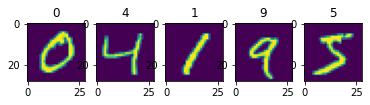

In [2]:
# # Loading MNIST Datasets
# # Additional Reference for loading & preprocessing the dataset 
# # https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
# import tensorflow.keras.datasets.mnist as mnist_dataset
# (x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

# print('Example data: ')
# for idx, x in enumerate(zip(x_train[:5], y_train[:5])):
#     plt.subplot("15{}".format(idx))
#     plt.title(x[1])
#     plt.imshow(x[0])

# # Cast as float
# x_train = x_train.astype("float32")
# x_test = x_test.astype("float32")

# # Normalize Data
# x_train /= 255.0
# x_test /= 255.0

# # Prepare data for
# # x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# # x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# # Flatten the input (Because we do not use CNN)
# x_train = np.array([x.flatten() for x in x_train])
# x_test = np.array([x.flatten() for x in x_test])

# # Transform Labels
# le = OneHotEncoder(sparse=False)
# yy = y_train.reshape(-1, 1)
# # y_train = le.fit_transform(yy).toarray()
# le.fit(yy)
# # y_train = le.transform(yy).toarray()
# y_train = le.transform(yy)

# yy = y_test.reshape(-1, 1)
# # y_test = le.fit_transform(yy).toarray()
# # y_test = le.transform(yy).toarray()
# y_test = le.transform(yy)


# print("YY SHape:", yy.shape)
# print("YY1", yy[0])


# print("Y_TRAIN")
# print("SHAPE: ",y_test.shape)
# print("First: ",y_test[0])
# print("FShpe: ",y_test[0].shape)



In [ ]:
# Loading MNIST Datasets
# Additional Reference for loading & preprocessing the dataset 
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
from sklearn import datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X = wine.data
y = wine.target

y_ = y.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20)


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 20)                15700     
_________________________________________________________________
fc_output (Dense)            (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
None
X Train Shape (60000, 784)
X Train Elemn [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

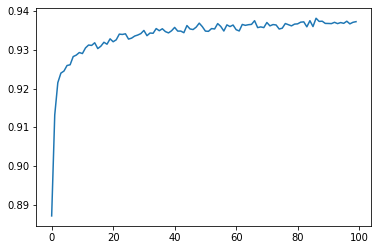

In [3]:
# Build the model

model = Sequential()

# MNIST Model
# model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
# model.add(MaxPooling2D((2,2)))
# model.add(Flatten())
model.add(Dense(20, activation="relu", name="fc1",  input_shape=(x_train[0].shape[0],)))
model.add(Dense(10, activation="softmax", name="fc_output"))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.01)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
print("X Train Shape",x_train.shape)
print("X Train Elemn",x_train[0])
print("Y Train Shape:",y_train.shape)
print("Y Train Elemn:",y_train[0])
print("Input Shape:", model.input.shape)
train_history = model.fit(x_train, y_train, verbose=1, batch_size=10, epochs=100)

plt.plot(train_history.history["accuracy"])
plt.show(block=False)

313/313 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.9210
Evaluating Model Using test splits dataset
Final test set loss: 0.619087
Final test set accuracy: 0.921000
Model input: (None, 784)
Example Prediction from test split: 


C:\Users\johan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
C:\Users\johan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
C:\Users\johan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
C:\Users\johan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element pos

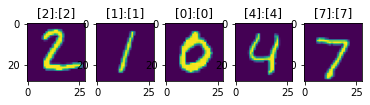

In [4]:
# Test on unseen data

results = model.evaluate(x_test, y_test)

print("Evaluating Model Using test splits dataset")
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


print("Model input:", model.input.shape)
print('Example Prediction from test split: ')
for idx, x in enumerate(zip(x_test[:5], y_test[:5])):
    plt.subplot("15{}".format(idx))
    pred = model.predict(np.array([x[0]]))
    pred = le.inverse_transform(pred)
    truth = le.inverse_transform([x[1]])
    plt.title("{}:{}".format(truth[0], pred[0]))
    plt.imshow(np.array(x[0]).reshape((28,28,1)))
plt.show(block=False)
